In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [86]:
df = pd.read_csv('../data/chaussure-homme.csv')
df

,web_scraper_order,web_scraper_start_url,price,article_type,image_link,address
0,1765066130-1,https://sn.coinafrique.com/categorie/chaussure...,25 000CFA,Chaussures Lebron James,https://images.coinafrique.com/thumb_2386645_u...,"Dakar, Sénégal"
1,1765066130-2,https://sn.coinafrique.com/categorie/chaussure...,22 000CFA,Baskets Nike AF 1,https://images.coinafrique.com/thumb_2386637_u...,"Dakar, Sénégal"
2,1765066130-3,https://sn.coinafrique.com/categorie/chaussure...,30 000CFA,Baskets Jordan,https://images.coinafrique.com/thumb_2386633_u...,"Dakar, Sénégal"
3,1765066130-4,https://sn.coinafrique.com/categorie/chaussure...,20 000CFA,Baskets Nike Zoom,https://images.coinafrique.com/thumb_2386629_u...,"Dakar, Sénégal"
4,1765066130-5,https://sn.coinafrique.com/categorie/chaussure...,20 000CFA,Baskets Nike 270,https://images.coinafrique.com/thumb_2386624_u...,"Dakar, Sénégal"
...,...,...,...,...,...,...
9907,1765114900-9908,https://sn.coinafrique.com/categorie/chaussure...,Prix sur demande,Chaussures orthopédique,https://images.coinafrique.com/thumb_5579068_u...,"Guediawaye, Dakar, Sénégal"
9908,1765114900-9909,https://sn.coinafrique.com/categorie/chaussure...,22 000CFA,Chaussures homme,https://images.coinafrique.com/thumb_5576783_u...,"Sacré-Coeur, Dakar, Sénégal"
9909,1765114900-9910,https://sn.coinafrique.com/categorie/chaussure...,15 000CFA,Chaussures homme,https://images.coinafrique.com/thumb_5576741_u...,"Diamalaye 1, Dakar, Sénégal"
9910,1765114900-9911,https://sn.coinafrique.com/categorie/chaussure...,25 000CFA,Chaussures,https://images.coinafrique.com/thumb_5532851_u...,"Fass, Dakar, Sénégal"


In [87]:
df.isna().sum()

web_scraper_order        0
web_scraper_start_url    0
price                    0
article_type             0
image_link               0
address                  0
dtype: int64

In [88]:
# Sélection des colonnes
df = df[['price', 'article_type', 'address']]

df['price'] = df['price'].str.replace('CFA', '').str.replace(' ', '') 
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0).astype(int)

/tmp/ipykernel_89631/4274755056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('CFA', '').str.replace(' ', '')
/tmp/ipykernel_89631/4274755056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0).astype(int)


In [89]:
df.duplicated().sum()

np.int64(4640)

In [90]:
df.drop_duplicates()

,price,article_type,address
0,25000,Chaussures Lebron James,"Dakar, Sénégal"
1,22000,Baskets Nike AF 1,"Dakar, Sénégal"
2,30000,Baskets Jordan,"Dakar, Sénégal"
3,20000,Baskets Nike Zoom,"Dakar, Sénégal"
4,20000,Baskets Nike 270,"Dakar, Sénégal"
...,...,...,...
9904,6000,Tapettes homme,"Almadies, Dakar, Sénégal"
9906,12000,Baskets Nike Air Max DN,"Fann, Dakar, Sénégal"
9908,22000,Chaussures homme,"Sacré-Coeur, Dakar, Sénégal"
9910,25000,Chaussures,"Fass, Dakar, Sénégal"


In [91]:
len(df['article_type'].unique())

1816

In [92]:
df['article_type'].value_counts()

article_type
Chaussures homme              3136
Baskets homme                  393
Sandales homme                 193
Baskets Nike                   170
Chaussures hommes              163
                              ... 
Baskets Asic kayono              1
Baskets Air force                1
Chaussures Air f1                1
Asic Gel Nyc                     1
Baskets Air force montante       1
Name: count, Length: 1816, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         9912 non-null   int64 
 1   article_type  9912 non-null   object
 2   address       9912 non-null   object
dtypes: int64(1), object(2)
memory usage: 232.4+ KB


In [94]:
#df_o = df.copy()

In [37]:
df = df_o.copy()

NameError: name 'df_o' is not defined

In [38]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

/tmp/ipykernel_89631/3828005640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [95]:
df.isna().sum()

price           0
article_type    0
address         0
dtype: int64

In [96]:
df.dropna(inplace=True)
df.isna().sum()


/tmp/ipykernel_89631/4045426068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


price           0
article_type    0
address         0
dtype: int64

In [98]:
df[(df['price']>50000)].sample(10)

,price,article_type,address
5829,120000,Chaussures Berluti Shadow en cuir,"Parcelle Assainies, Dakar, Sénégal"
8783,115000,Jordan jumpman jack,"Dakar Plateau, Dakar, Sénégal"
7422,200000,Chaussures homme,"Dakar, Sénégal"
5830,120000,Chaussures Berluti Shadow,"Parcelle Assainies, Dakar, Sénégal"
4141,350000,Baskets Nike Jordan,"Ouest Foire, Dakar, Sénégal"
1854,70002,Chaussures homme,"Dakar, Sénégal"
3644,150000,Baskets Jordan,"Fann, Dakar, Sénégal"
7617,60000,Chaussures Timberland,"Ouest Foire, Dakar, Sénégal"
1915,350000,Baskets homme,"Colobane, Dakar, Sénégal"
1343,150000000,Chaussures homme,"Dakar Plateau, Dakar, Sénégal"


In [69]:
df.columns

Index(['price', 'article_type', 'address'], dtype='object')

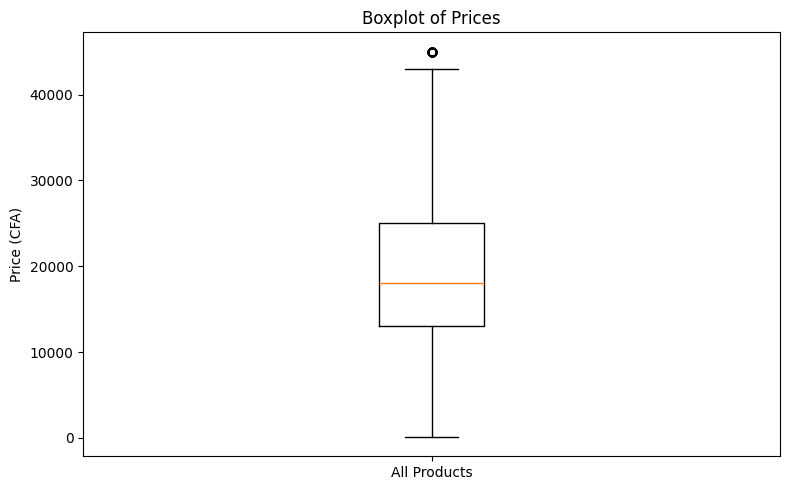

In [83]:
df = df[(df['price']>0) & (df['price']<50000) ]
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df['price'].dropna(), vert=True)  # dropna pour éviter les NaN
plt.title("Boxplot of Prices")
plt.ylabel("Price (CFA)")
plt.xticks([1], ["All Products"])
plt.tight_layout()
plt.show()


In [77]:
df['address'].value_counts

<bound method IndexOpsMixin.value_counts of 0                    Dakar, Sénégal
1                    Dakar, Sénégal
2                    Dakar, Sénégal
3                    Dakar, Sénégal
4                    Dakar, Sénégal
                   ...             
9906           Fann, Dakar, Sénégal
9908    Sacré-Coeur, Dakar, Sénégal
9909    Diamalaye 1, Dakar, Sénégal
9910           Fass, Dakar, Sénégal
9911           Fass, Dakar, Sénégal
Name: address, Length: 7958, dtype: object>

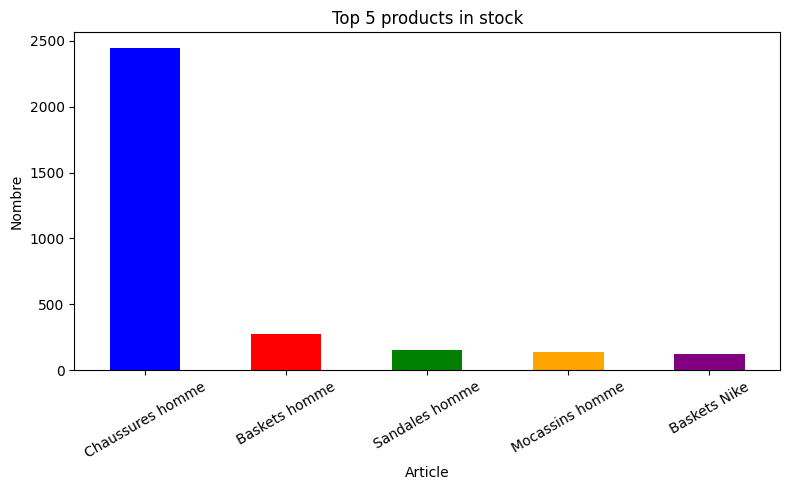

In [78]:
top5 = df['article_type'].value_counts(ascending=False).head(5)
colors = ['blue', 'red', 'green', 'orange', 'purple']
plt.figure(figsize=(8, 5))
top5.plot(kind='bar', color=colors) 
plt.title("Top 5 products in stock")
plt.xlabel("Article")
plt.ylabel("Nombre")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()


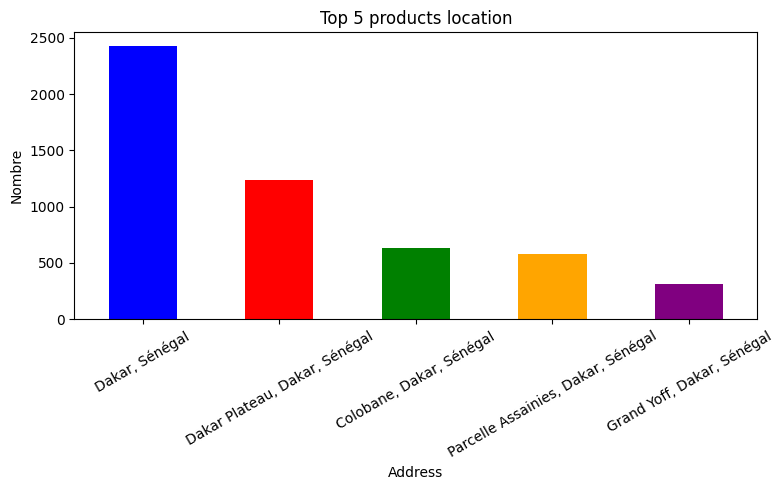

In [79]:
top5 = df['address'].value_counts().head(5)
colors = ['blue', 'red', 'green', 'orange', 'purple']
plt.figure(figsize=(8, 5))
top5.plot(kind='bar', color=colors) 
plt.title("Top 5 products location")
plt.xlabel('Address')
plt.ylabel("Nombre")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()


<Figure size 800x500 with 0 Axes>

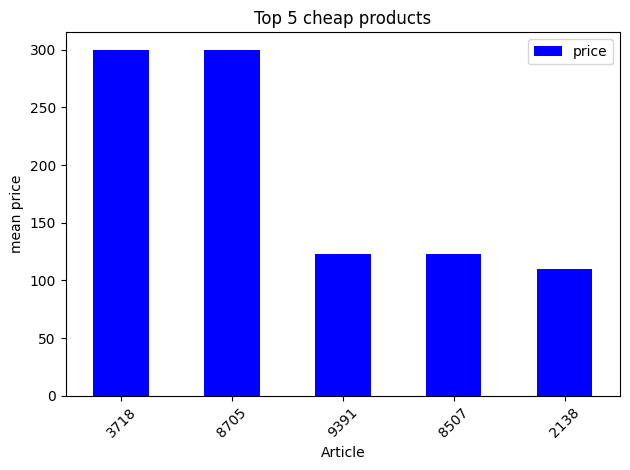

In [80]:
top5 = (
    df[['article_type', 'price']]
    .sort_values('price', ascending=False)   # sort by mean price
    .tail(5)
)
colors = ['blue', 'red', 'green', 'orange', 'purple']
plt.figure(figsize=(8, 5))
top5.plot(kind='bar', color=colors) 
plt.title("Top 5 cheap products")
plt.xlabel("Article")
plt.ylabel("mean price")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [74]:
top5

,article_type,price
8523,Chaussures friperie,0
3582,Baskets Homme,0
3583,Chaussures hommes,0
3586,Chaussures homme,0
7288,Baskets Tommy Hilfiger,0


<Figure size 800x500 with 0 Axes>

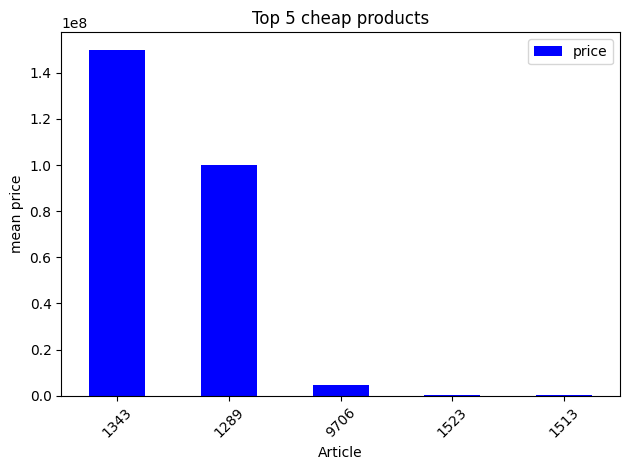

In [75]:
top5 = (
    df[['article_type', 'price']]
    .sort_values('price', ascending=False)   # sort by mean price
    .head(5)
)
colors = ['blue', 'red', 'green', 'orange', 'purple']
plt.figure(figsize=(8, 5))
top5.plot(kind='bar', color=colors) 
plt.title("Top 5 cheap products")
plt.xlabel("Article")
plt.ylabel("mean price")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [50]:
top5

,price
article_type,
Peugeot 308 2019,4500000.0
Air Max 720,550000.0
Chaussures Louboutin 42,450000.0
Chaussures Nike Air Max 95,165000.0
Baskets Christian Louboutin,150000.0


In [48]:
df.describe(

)


,price
count,7.958000e+03
mean,5.150510e+04
std,2.021132e+06
min,1.100000e+02
25%,1.300000e+04
50%,1.800000e+04
75%,2.500000e+04
max,1.500000e+08


In [27]:
df['price'].min()

np.float64(110.0)

In [127]:
def data_ploting(df):
    #processing
    df = df[['price', 'article_type', 'address']]
    df= df.dropna()
    df= df.drop_duplicates()
    df['price'] = df['price'].str.replace('CFA', '').str.replace(' ', '') 
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    #ploting
    top5_in_stock = df['article_type'].value_counts(ascending=False).head(5)
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    plt.figure(figsize=(8, 5))
    top5_in_stock.plot(kind='bar', color=colors) 
    plt.title("Top 5 products in stock")
    plt.xlabel("Article")
    plt.ylabel("Nombre")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    top5_address = df['address'].value_counts().head(5)
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    plt.figure(figsize=(8, 5))
    top5_address.plot(kind='bar', color=colors) 
    plt.title("Top 5 products location")
    plt.xlabel('Address')
    plt.ylabel("Nombre")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
             
    top5_expensive = (df[['article_type', 'price']]
                      .sort_values('price', ascending=False).set_index('article_type').head(5))
    
    plt.figure(figsize=(8, 5))
    top5_expensive.plot(kind='bar', color=colors, legend=False)
    plt.title("Top 5 Expensive Products")
    plt.xlabel("Article")
    plt.ylabel("Price (CFA)")
    plt.xticks(rotation=45)


    return df

Empty DataFrame
Columns: [price, article_type, address]
Index: []


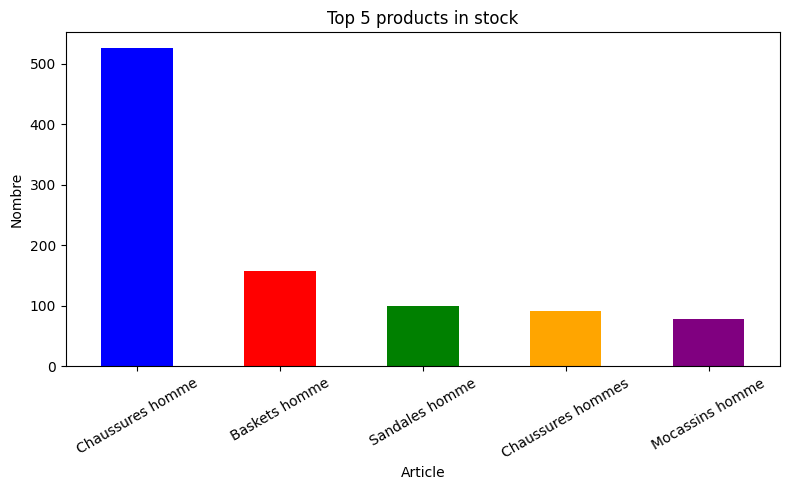

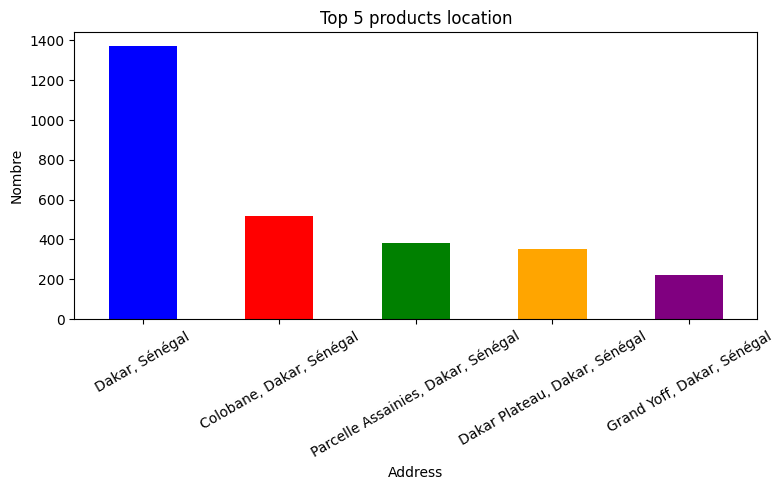

,price,article_type,address
0,25000.0,Chaussures Lebron James,"Dakar, Sénégal"
1,22000.0,Baskets Nike AF 1,"Dakar, Sénégal"
2,30000.0,Baskets Jordan,"Dakar, Sénégal"
3,20000.0,Baskets Nike Zoom,"Dakar, Sénégal"
4,20000.0,Baskets Nike 270,"Dakar, Sénégal"
...,...,...,...
9904,6000.0,Tapettes homme,"Almadies, Dakar, Sénégal"
9906,12000.0,Baskets Nike Air Max DN,"Fann, Dakar, Sénégal"
9908,22000.0,Chaussures homme,"Sacré-Coeur, Dakar, Sénégal"
9910,25000.0,Chaussures,"Fass, Dakar, Sénégal"


<Figure size 800x500 with 0 Axes>

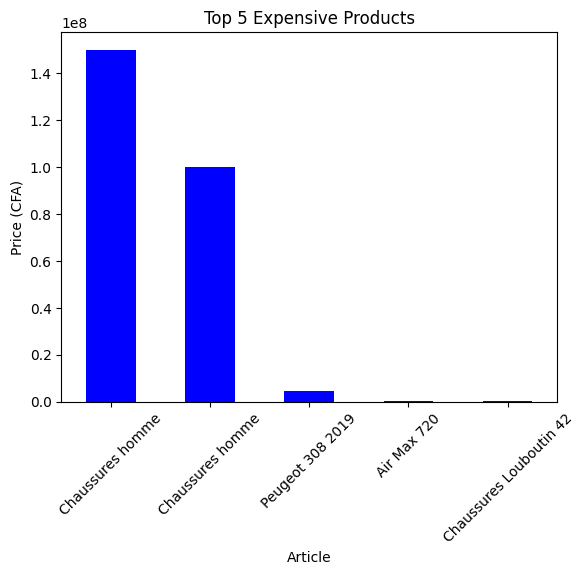

In [128]:
data_ploting(pd.read_csv('../data/chaussure-homme.csv'))

In [105]:
df.min()

price                                    0
article_type                        Adidas
address         Almadies 2, Dakar, Sénégal
dtype: object

In [110]:
df[df['price']<100]

,price,article_type,address
12,0,Mocassins homme,"Pikine, Sénégal"
28,0,Chaussure Nike Air Max,"Dakar, Sénégal"
36,0,Baskets,"Dakar, Sénégal"
56,0,Chaussures homme,"Sicap Liberté, Dakar, Sénégal"
57,0,Chaussures homme,"Sicap Liberté, Dakar, Sénégal"
...,...,...,...
9805,0,Chaussures homme,"Dakar, Sénégal"
9820,0,Chaussures homme,"Dakar, Sénégal"
9821,0,Timberland homme,"Mbao, Dakar, Sénégal"
9905,0,Chaussures homme,"Keur Massar, Sénégal"


In [135]:
def data_ploting(df):
    df = df[['price', 'article_type', 'address']].dropna().drop_duplicates()
    df['price'] = df['price'].str.replace('CFA', '').str.replace(' ', '')
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    
    top5_in_stock = df['article_type'].value_counts().head(5)
    print(top5_in_stock)
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    plt.figure(figsize=(8, 5))
    top5_in_stock.plot(kind='bar', color=colors)
    plt.title("Top 5 products in stock")
    plt.ylabel("Nombre")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    top5_address = df['address'].value_counts().head(5)
    plt.figure(figsize=(8, 5))
    top5_address.plot(kind='bar', color=colors)
    plt.title("Top 5 locations")
    plt.ylabel("Nombre")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    top5_expensive = df[['article_type', 'price']].set_index('article_type').sort_values('price', ascending=False).head(5)
    plt.figure(figsize=(8, 5))
    top5_expensive.plot(kind='bar', color=colors, legend=False)
    plt.title("Top 5 Expensive Products")
    plt.ylabel("Price (CFA)")
    plt.xticks(rotation=45)
    
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()


article_type
Vêtements enfants    66
Vêtements enfant     45
Ensemble enfant      40
Robe enfant          40
Vêtement enfant      39
Name: count, dtype: int64


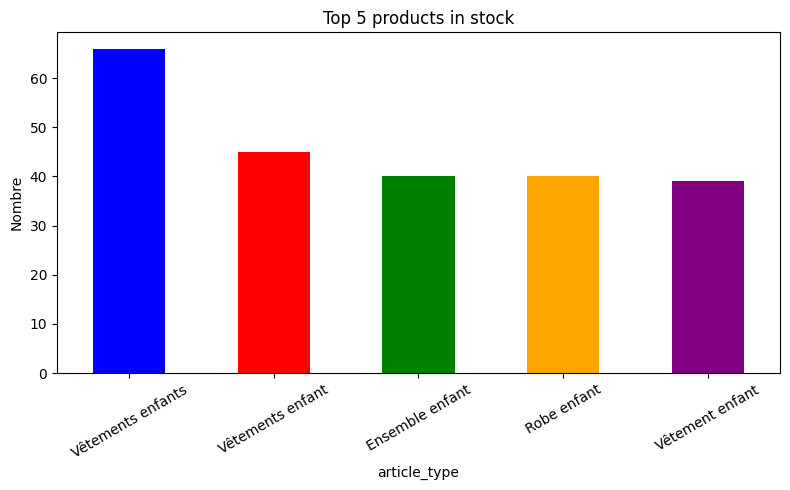

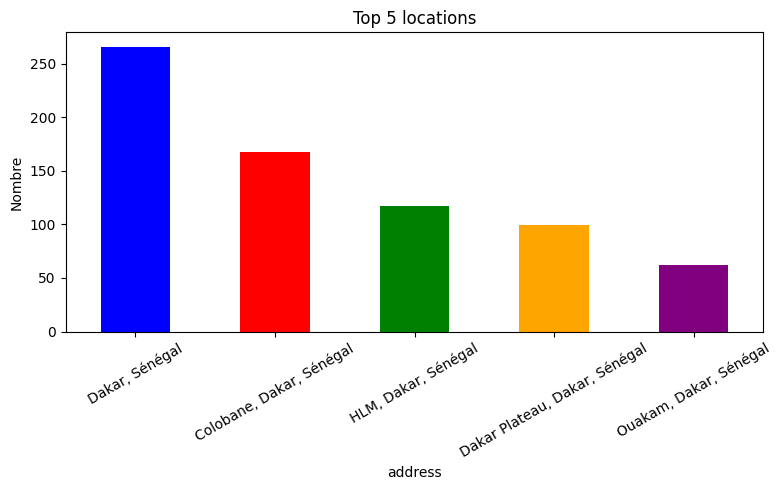

<Figure size 800x500 with 0 Axes>

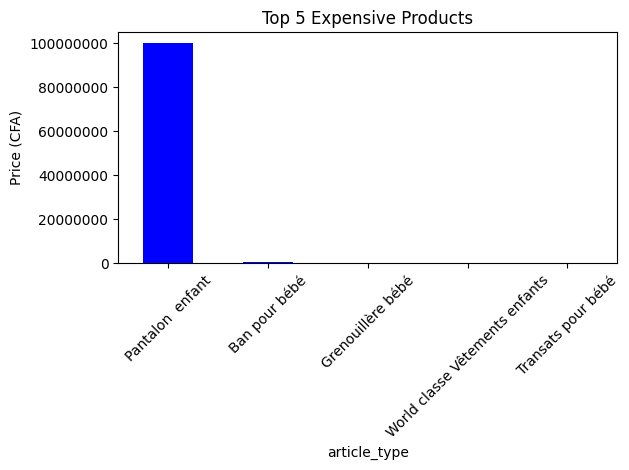

In [136]:
data_ploting(pd.read_csv('../data/vetement-enfant.csv'))